In [140]:
import   numpy                       as  np
import   pandas                      as  pd
import   matplotlib.pyplot           as  plt
import   seaborn                     as  sns
%matplotlib inline
import   scipy.stats                 as stats
import   statsmodels.formula.api     as sm
from     scipy.stats       import    zscore
from     statsmodels.api   import    add_constant
from     sklearn           import    metrics
from     sklearn.tree      import    DecisionTreeClassifier
from     sklearn           import    metrics,tree
from     sklearn.model_selection import train_test_split
from     IPython.display   import    Image
from     os                import    system
from     sklearn.model_selection import GridSearchCV
from     sklearn.ensemble import RandomForestClassifier
from     sklearn.preprocessing import StandardScaler
from sklearn import model_selection
importlib graphviz as gp

In [74]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [75]:
df.shape

(768, 9)

In [76]:
df.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [77]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

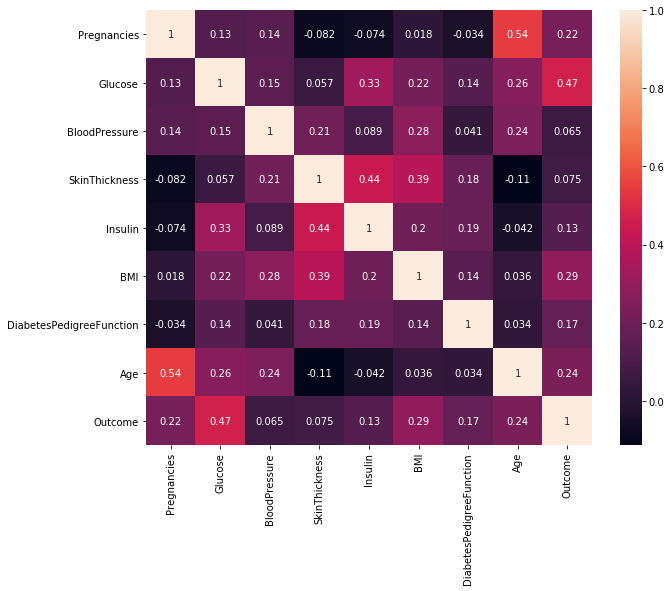

In [78]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr(),annot=True)
plt.show()

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [102]:
x=df.drop('Outcome',axis=1)
y=df.Outcome
x_std=StandardScaler().fit_transform(x)
x_std=pd.DataFrame(x_std,columns=x.columns)
pd.DataFrame(x_std).head()
x.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=2)

In [104]:
Xtrain=np.array(x_train)
Ytrain=np.array(y_train)
Xtest=np.array(x_test)
Ytest=np.array(y_test)

In [105]:
x_train.shape

(537, 8)

In [106]:
x_test.shape

(231, 8)

In [131]:
#Decision Tree only 1 Decision tree is creaated with best parameters that causes high biasing error which cannot be controlled
model=DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=3)
model.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [139]:
# Random Forest Model will create multiple Decision trees with diff features,number of features for each tree is sqrt of number of features
Rf_model=RandomForestClassifier(n_estimators=50,criterion='entropy',max_depth=3,random_state=0)
# once comparison is done we have to remove Random_state to ensure randomness is there in out model

Rf_model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [133]:
C_pred=Rf_model.predict(Xtest)
C_pred
C_train_pred=Rf_model.predict(Xtrain)
#C_train_pred

In [134]:
#Accuracy
acc=metrics.accuracy_score(Ytest,C_pred)
acc

0.7878787878787878

In [135]:
# Confusion Matrix
cm=metrics.confusion_matrix(Ytest,C_pred)
print(cm)
pd.crosstab(Ytest,C_pred)

[[148   7]
 [ 42  34]]


col_0,0,1
row_0,,
0,148,7
1,42,34


In [136]:
cr=metrics.classification_report(Ytrain,C_train_pred)
print(cr)
cr1=metrics.classification_report(Ytest,C_pred)
print(cr1)

             precision    recall  f1-score   support

          0       0.79      0.95      0.86       345
          1       0.86      0.54      0.66       192

avg / total       0.81      0.80      0.79       537

             precision    recall  f1-score   support

          0       0.78      0.95      0.86       155
          1       0.83      0.45      0.58        76

avg / total       0.80      0.79      0.77       231



In [137]:
# Importance of each Attribute
pd.DataFrame(model.feature_importances_,columns=['Imp'],index=x_train.columns)

,Imp
Pregnancies,0.000000
Glucose,0.589063
BloodPressure,0.000000
SkinThickness,0.000000
Insulin,0.000000
BMI,0.286405
DiabetesPedigreeFunction,0.000000
Age,0.124532


Decision Tree:  Performance Range is 0.656 - 0.833 with a Varience error of (0.049889) and Mean of 0.742188
T
Random Forest:  Performance Range is 0.635 - 0.812 with a Varience error of (0.055716) and Mean of 0.748698
T


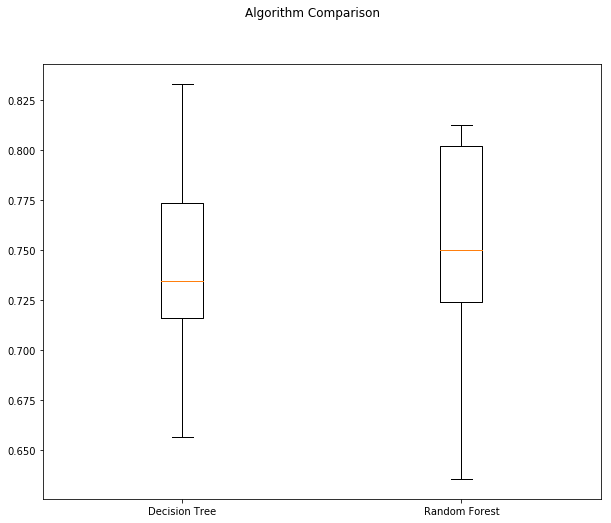

In [138]:
mod=[]
mod.append(('Decision Tree',model))
mod.append(('Random Forest',Rf_model))
result=[]
names=[]
scoring='accuracy'
for name,model in mod:
    kfold=model_selection.KFold(n_splits=8,random_state=2)# 5 fold cross validation function
    cv_results=model_selection.cross_val_score(model,x_std,y,cv=kfold,scoring='accuracy')
    result.append(cv_results)
    names.append(name)
    msg="%s:  Performance Range is %1.3f %s %1.3f with a Varience error of (%f) and Mean of %f"%(name,cv_results.min(),'-',cv_results.max(),cv_results.std(),cv_results.mean())
    print(msg)
    print("T")
# boxplot for the models

fig=plt.figure(figsize=[10,8])
fig.suptitle("Algorithm Comparison")
ax=fig.add_subplot(111)
plt.boxplot(result)
ax.set_xticklabels(names)
plt.show()


In [ ]:
cv_results.min()

In [ ]:

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )


In [ ]:
system("dot -Tpng wine_tree_randomforest.dot -o wine_tree_randomforest.png")   # This command is to the OS
Image("wine_tree_randomforest.png")  


In [ ]:
cr = metrics.classification_report(y_test,C_pred)
print(cr)

In [ ]:
#Gridsearch is a cross fold validation giving the depth with for k fold that gives best number od parameters
parameter = {'max_depth':np.arange(1,10)} # we are restricting the depth to 10 layers
GS = GridSearchCV(model,parameter,cv=3) # we give the model created  above inside the GridSearch to give best number of Parameters
GS.fit(x,y)

In [ ]:
GS.best_params_

In [ ]:
(58+77+72)/3

In [ ]:
(40+45)/2